A Simple XOR Example of SVD-DNN
It will not show the speed improvements since the data and model are small

In [1]:
using LinearAlgebra

using Flux
using Flux: onehotbatch, onecold, @epochs
using Flux.Data: DataLoader
using Flux.Optimise
using Zygote: Params

using BenchmarkTools: @btime
using TimerOutputs

using Plots

In [27]:
include("./SVDNN.jl")

train_epochs_svd! (generic function with 3 methods)

In [28]:
include("./SVDNN_utils.jl")

train_epochs_svd! (generic function with 3 methods)

# Data

In [5]:
# inputs for XOR
# each column contains the vector of input (A and B)
# 4 columns = 4 inputs
X = [0 0 1 1; 0 1 0 1]
X = Array{Float32, 2}(X)

2×4 Array{Float32,2}:
 0.0  0.0  1.0  1.0
 0.0  1.0  0.0  1.0

In [6]:
# corresponding outputs (to each columns)
Y = [0, 1, 1, 0]

4-element Array{Int64,1}:
 0
 1
 1
 0

In [7]:
data = DataLoader(X, Y)

DataLoader((Float32[0.0 0.0 1.0 1.0; 0.0 1.0 0.0 1.0], [0, 1, 1, 0]), 1, 4, true, 4, [1, 2, 3, 4], false)

# Model

In [8]:
num_features = 2  # size of each input vector
num_hidden_layer_neurons = 20  # Number of neurons in hidden layer
learning_rate = 0.01

0.01

In [29]:
# build model
model = Chain(
              Dense(num_features, num_hidden_layer_neurons, relu),
              Dense(num_hidden_layer_neurons, num_hidden_layer_neurons, relu),
              Dense(num_hidden_layer_neurons, 1, σ)
             )

# store parameters of model
ps = params(model)
println("Model has $(sum(length, ps)) parameters")

# optimizer, gradient descent
opt = Descent(learning_rate)
opt2 = Descent(learning_rate)

# loss function
loss(x, y, model) = Flux.binarycrossentropy(model(x)[1], y[1])

# arrays for plotting graphs
costs = []
accuracies = []
test_accuracies = []

Model has 501 parameters


0-element Array{Any,1}

In [11]:
function cost_function(data, loss, model)
    losses = []
    for (x, y) in data
        push!(losses, loss(x, y, model))
    end
    avg_loss = sum(losses)/length(losses)
    return avg_loss
end

function accuracy(data, model)
    corrects = []
    for (x, y) in data
        pred = model(x)[1]
        pred = pred >= 0.5 ? 1 : 0
        push!(corrects, pred == y[1])
    end
    return sum(corrects)/length(corrects)
end

accuracy (generic function with 1 method)

# SVDNN train

In [17]:
function show_maximum_l_values(model)
    maximum_l_values = Integer[]
    for layer in model
        m, n = size(layer.W)
        push!(maximum_l_values, floor((m*n)/(m+n)))
    end
    return maximum_l_values
end

show_maximum_l_values (generic function with 1 method)

In [18]:
max_l_values = show_maximum_l_values(model)

3-element Array{Integer,1}:
  1
 10
  0

In [19]:
# set these values to be lesser than the above
# nothing implies that the layer is not converted to SVDense
# l_values = map(x -> x ÷ 2 == 0 ? 1 : x ÷ 2, max_l_values)
# l_values = Array{Union{Nothing, Integer}}(l_values)
# l_values[end] = nothing # no SVD on the last layer, this gives much better results
l_values = [1, 5, nothing]

3-element Array{Union{Nothing, Int64},1}:
 1       
 5       
  nothing

In [33]:
@timeit to "Full training SVD" train_epochs_svd!(model, l_values, loss, data, data, opt, opt2, 800)

Cost at epoch 1 is 0.022278786. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 2 is 0.022216491. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 3 is 0.022164157. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 4 is 0.022114499. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 5 is 0.022054547. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 6 is 0.022000635. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 7 is 0.021947656. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 8 is 0.021884052. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 9 is 0.021829259. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 10 is 0.021768307. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 11 is 0.021716647. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 12 is 0.021666786. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 13 is 0.021606805. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 14 is 0.021552987. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 15 is 0.021504018. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 16 is 0.021445487. A

Cost at epoch 159 is 0.013972627. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 160 is 0.013916754. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 161 is 0.01386174. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 162 is 0.013807209. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 163 is 0.013752398. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 164 is 0.013700403. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 165 is 0.013646311. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 166 is 0.013592452. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 167 is 0.013539874. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 168 is 0.013487225. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 169 is 0.013434762. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 170 is 0.013383016. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 171 is 0.013331324. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 172 is 0.013280383. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 173 is 0.013231581. Accuracy 1.0. Test accuracy 1.0
Cost at epo

Cost at epoch 313 is 0.008498523. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 314 is 0.008475276. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 315 is 0.008453152. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 316 is 0.008429687. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 317 is 0.008408064. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 318 is 0.008384913. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 319 is 0.008361788. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 320 is 0.008340353. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 321 is 0.008317418. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 322 is 0.0082962625. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 323 is 0.008273376. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 324 is 0.008252502. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 325 is 0.008229867. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 326 is 0.008207475. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 327 is 0.008186539. Accuracy 1.0. Test accuracy 1.0
Cost at e

Cost at epoch 468 is 0.005887652. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 469 is 0.005875194. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 470 is 0.005862886. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 471 is 0.0058507435. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 472 is 0.0058386154. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 473 is 0.005826743. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 474 is 0.0058147823. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 475 is 0.00580261. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 476 is 0.0057919966. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 477 is 0.0057797823. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 478 is 0.005767749. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 479 is 0.0057557747. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 480 is 0.00574386. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 481 is 0.0057320343. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 482 is 0.005720257. Accuracy 1.0. Test accuracy 1.0
Cost 

Cost at epoch 623 is 0.004404376. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 624 is 0.004396855. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 625 is 0.0043894844. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 626 is 0.0043822173. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 627 is 0.0043747127. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 628 is 0.004367477. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 629 is 0.004359941. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 630 is 0.004353139. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 631 is 0.00434568. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 632 is 0.004338326. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 633 is 0.0043309107. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 634 is 0.004323601. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 635 is 0.004316396. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 636 is 0.0043090265. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 637 is 0.00430239. Accuracy 1.0. Test accuracy 1.0
Cost at

In [34]:
print_timer(to)

 ──────────────────────────────────────────────────────────────────────────────
                                       Time                   Allocations      
                               ──────────────────────   ───────────────────────
       Tot / % measured:            26.8s / 6.84%            196MiB / 98.3%    

 Section               ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 Full training SVD          1    1.36s  74.1%   1.36s    125MiB  64.5%   125MiB
   Tuning SVD model         1    714ms  38.9%   714ms   74.9MiB  38.8%  74.9MiB
     [SVD] Train on...    720    624ms  34.0%   867μs   58.9MiB  30.5%  83.7KiB
       Calculate gr...  2.88k    491ms  26.7%   170μs   53.2MiB  27.6%  18.9KiB
       Update params    2.88k   5.94ms  0.32%  2.06μs     0.00B  0.00%    0.00B
       Get params         720   5.51ms  0.30%  7.66μs   1.05MiB  0.55%  1.50KiB
     [SVD] Calculat...    720   28.7ms 

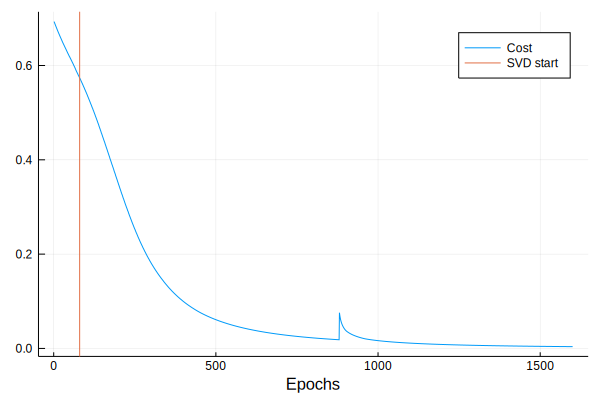

In [35]:
plot(costs, label = "Cost")
# plot!(accuracies, label = "Accuracy")
# plot!(test_accuracies, label = "Test Accuracy")
xlabel!("Epochs")
vline!([80], label = "SVD start", legend = :topright)

In [46]:
round(Int, model([0; 0])[1])

0

# Normal train

Re-initialise the model before running this

In [30]:
@timeit to "Full training" train_epochs!(loss, data, data, opt, model, 800)

Cost at epoch 1 is 0.69317645. Accuracy 0.25. Test accuracy 0.25
Cost at epoch 2 is 0.69153786. Accuracy 0.25. Test accuracy 0.25
Cost at epoch 3 is 0.68976486. Accuracy 0.5. Test accuracy 0.5
Cost at epoch 4 is 0.6879661. Accuracy 0.5. Test accuracy 0.5
Cost at epoch 5 is 0.68617165. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 6 is 0.68440735. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 7 is 0.68265843. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 8 is 0.68091065. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 9 is 0.6792081. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 10 is 0.6774636. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 11 is 0.67571336. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 12 is 0.67399025. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 13 is 0.6723291. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 14 is 0.6706445. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 15 is 0.66910934. Accuracy 0.75. Test accuracy 0.75
Cost at epoch 16 is 0.667448

Cost at epoch 162 is 0.4265958. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 163 is 0.42482102. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 164 is 0.42266798. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 165 is 0.42080426. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 166 is 0.41837907. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 167 is 0.41653425. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 168 is 0.41432798. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 169 is 0.4122843. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 170 is 0.41029984. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 171 is 0.40804067. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 172 is 0.40640402. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 173 is 0.40367717. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 174 is 0.40176445. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 175 is 0.3996535. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 176 is 0.3978482. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 177 is 0.395715

Cost at epoch 321 is 0.15890047. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 322 is 0.15777476. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 323 is 0.15700826. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 324 is 0.15583837. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 325 is 0.15493952. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 326 is 0.15402627. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 327 is 0.15297976. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 328 is 0.15216358. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 329 is 0.15116571. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 330 is 0.15029064. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 331 is 0.14918725. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 332 is 0.14845324. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 333 is 0.14757626. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 334 is 0.14650932. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 335 is 0.14577931. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 336 is 0.14

Cost at epoch 479 is 0.0669267. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 480 is 0.066655. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 481 is 0.06633154. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 482 is 0.06602672. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 483 is 0.06571341. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 484 is 0.06539937. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 485 is 0.065141924. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 486 is 0.064845756. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 487 is 0.06456232. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 488 is 0.0642773. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 489 is 0.06397469. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 490 is 0.06371138. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 491 is 0.06341541. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 492 is 0.06314988. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 493 is 0.062878646. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 494 is 0.062

Cost at epoch 636 is 0.03618504. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 637 is 0.036069985. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 638 is 0.035945907. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 639 is 0.035809454. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 640 is 0.035702966. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 641 is 0.035600383. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 642 is 0.035464738. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 643 is 0.035344113. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 644 is 0.03522975. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 645 is 0.035118032. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 646 is 0.035000484. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 647 is 0.03488098. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 648 is 0.034766156. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 649 is 0.03464313. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 650 is 0.03454339. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 6

Cost at epoch 792 is 0.022798292. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 793 is 0.022742117. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 794 is 0.022693612. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 795 is 0.022625806. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 796 is 0.022569941. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 797 is 0.022507148. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 798 is 0.022457333. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 799 is 0.022397. Accuracy 1.0. Test accuracy 1.0
Cost at epoch 800 is 0.02233635. Accuracy 1.0. Test accuracy 1.0


In [31]:
print_timer(to)

 ──────────────────────────────────────────────────────────────────────────────
                                       Time                   Allocations      
                               ──────────────────────   ───────────────────────
       Tot / % measured:            14.0s / 3.38%           70.3MiB / 97.4%    

 Section               ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 Full training              1    475ms   100%   475ms   68.5MiB  100%   68.5MiB
   Train one step         800    218ms  45.9%   272μs   42.1MiB  61.5%  53.9KiB
     Calculate grad...  3.20k    188ms  39.7%  58.9μs   39.1MiB  57.1%  12.5KiB
     Update params      3.20k   7.25ms  1.53%  2.26μs     0.00B  0.00%    0.00B
     Get params           800   5.33ms  1.12%  6.66μs   1.01MiB  1.48%  1.30KiB
   Calculate cost         800   25.5ms  5.38%  31.9μs   4.98MiB  7.27%  6.37KiB
   Calculate accuracy     800   18.9ms 

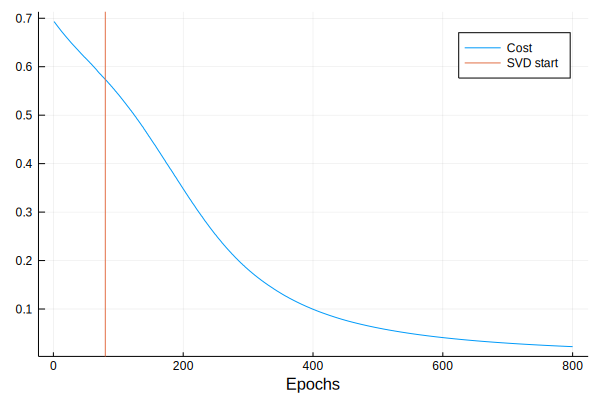

In [32]:
plot(costs, label = "Cost")
# plot!(accuracies, label = "Accuracy")
# plot!(test_accuracies, label = "Test Accuracy")
xlabel!("Epochs")
vline!([80], label = "SVD start", legend = :topright)